In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 24.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [2]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# 1 - Train and Eval YOLO

In [4]:
model = YOLO("yolo11n.pt")  # n = nhẹ nhất, có thể đổi sang yolov8s.pt, m.pt, l.pt

DATA = '/kaggle/input/fire-detection/FireDetection/data.yaml'
IMAGE_SIZE = 416
EPOCHS = 50
BATCH_SIZE = 32
PROJECT = 'fire_detection'
NAME = 'yolo11n_fire'

model.train(
    data=DATA,
    epochs=EPOCHS,
    imgsz=IMAGE_SIZE,
    batch=BATCH_SIZE,
    project=PROJECT,
    name=NAME,
    exist_ok=True
)


100%|██████████| 5.35M/5.35M [00:00<00:00, 102MB/s]


Ultralytics 8.3.109 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/input/fire-detection/FireDetection/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=fire_detection, name=yolo11n_fire, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

100%|██████████| 755k/755k [00:00<00:00, 25.9MB/s]
E0000 00:00:1744789198.286149      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744789198.357590      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/input/fire-detection/FireDetection/train/labels... 6164 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6164/6164 [00:15<00:00, 405.82it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/fire-detection/FireDetection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/fire-detection/FireDetection/val/labels... 770 images, 0 backgrounds, 0 corrupt: 100%|██████████| 770/770 [00:02<00:00, 346.67it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/fire-detection/FireDetection/val is not writeable, cache not saved.


Plotting labels to fire_detection/yolo11n_fire/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to fire_detection/yolo11n_fire
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.91G      1.722      2.204      1.573         62        416: 100%|██████████| 193/193 [00:35<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.75it/s]


                   all        770       1376      0.357      0.396      0.301      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.26G      1.811      1.896      1.623         53        416: 100%|██████████| 193/193 [00:32<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]


                   all        770       1376       0.44      0.463      0.423       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.26G      1.801      1.844      1.629         54        416: 100%|██████████| 193/193 [00:30<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]

                   all        770       1376      0.423      0.397      0.346       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.26G      1.794      1.825      1.619         41        416: 100%|██████████| 193/193 [00:32<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.20it/s]

                   all        770       1376      0.428      0.393       0.35      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.26G      1.757       1.77      1.593         48        416: 100%|██████████| 193/193 [00:31<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.17it/s]

                   all        770       1376      0.489      0.459      0.448      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.26G       1.73      1.722      1.562         51        416: 100%|██████████| 193/193 [00:31<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]

                   all        770       1376      0.554      0.459      0.492      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.26G      1.712      1.688      1.551         54        416: 100%|██████████| 193/193 [00:31<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.87it/s]

                   all        770       1376      0.429      0.393      0.366      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.26G      1.681      1.675      1.542         55        416: 100%|██████████| 193/193 [00:31<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.03it/s]

                   all        770       1376      0.474      0.475      0.436      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.26G      1.675      1.645      1.539         67        416: 100%|██████████| 193/193 [00:31<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.12it/s]

                   all        770       1376      0.516      0.432      0.441      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.26G      1.656      1.613      1.526         75        416: 100%|██████████| 193/193 [00:31<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.08it/s]

                   all        770       1376      0.565      0.438       0.48      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.26G      1.647      1.613      1.517         56        416: 100%|██████████| 193/193 [00:31<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.98it/s]

                   all        770       1376      0.559      0.467      0.504      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.26G      1.636      1.583      1.499         67        416: 100%|██████████| 193/193 [00:31<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.94it/s]

                   all        770       1376      0.523      0.478      0.481      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.26G       1.64      1.592       1.51         58        416: 100%|██████████| 193/193 [00:31<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]

                   all        770       1376      0.532      0.491      0.506      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.26G       1.61      1.553      1.494         63        416: 100%|██████████| 193/193 [00:31<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.13it/s]

                   all        770       1376      0.543      0.507      0.533      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.26G      1.617      1.562      1.493         78        416: 100%|██████████| 193/193 [00:31<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.22it/s]

                   all        770       1376      0.559      0.469      0.507      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.26G      1.612      1.555      1.489         67        416: 100%|██████████| 193/193 [00:31<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.16it/s]

                   all        770       1376        0.6      0.514      0.547      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.26G      1.597      1.531       1.48         65        416: 100%|██████████| 193/193 [00:31<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.10it/s]

                   all        770       1376      0.588      0.495      0.542       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.26G      1.595      1.528      1.493         65        416: 100%|██████████| 193/193 [00:31<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]

                   all        770       1376       0.59      0.505       0.55       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.26G      1.583      1.514      1.473         56        416: 100%|██████████| 193/193 [00:31<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.94it/s]

                   all        770       1376      0.579      0.481      0.528      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.26G      1.575      1.507       1.47         46        416: 100%|██████████| 193/193 [00:31<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.17it/s]

                   all        770       1376       0.59      0.521      0.566      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.26G      1.562      1.503      1.467         61        416: 100%|██████████| 193/193 [00:31<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.17it/s]

                   all        770       1376      0.601      0.526      0.576      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.26G      1.568      1.495      1.464         83        416: 100%|██████████| 193/193 [00:31<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.17it/s]

                   all        770       1376      0.598      0.523      0.572      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.26G      1.567      1.488       1.46         56        416: 100%|██████████| 193/193 [00:31<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.03it/s]

                   all        770       1376      0.602      0.515      0.559      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.26G      1.574      1.478      1.464         60        416: 100%|██████████| 193/193 [00:31<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.19it/s]

                   all        770       1376      0.607      0.511      0.561      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.26G      1.564       1.47      1.463         60        416: 100%|██████████| 193/193 [00:31<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]

                   all        770       1376      0.619      0.545      0.581      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.26G      1.554      1.476      1.449         57        416: 100%|██████████| 193/193 [00:31<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]

                   all        770       1376      0.616      0.538      0.582      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.26G      1.543      1.457      1.452         58        416: 100%|██████████| 193/193 [00:31<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.92it/s]

                   all        770       1376      0.558      0.558      0.565      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.26G      1.535      1.454      1.447         70        416: 100%|██████████| 193/193 [00:32<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.10it/s]

                   all        770       1376      0.616      0.499      0.556      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.26G      1.534      1.434      1.441         71        416: 100%|██████████| 193/193 [00:31<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.84it/s]

                   all        770       1376      0.591      0.523      0.571      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.26G       1.52      1.427      1.436         63        416: 100%|██████████| 193/193 [00:31<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.17it/s]

                   all        770       1376      0.638       0.53      0.603      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.26G      1.514      1.411      1.425         52        416: 100%|██████████| 193/193 [00:31<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.20it/s]

                   all        770       1376      0.603      0.545      0.597      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.26G      1.519      1.419      1.434         86        416: 100%|██████████| 193/193 [00:31<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]

                   all        770       1376      0.616      0.544      0.598      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.26G      1.507      1.412      1.421         58        416: 100%|██████████| 193/193 [00:31<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.98it/s]

                   all        770       1376       0.62      0.534      0.586      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.26G      1.498      1.403       1.42         57        416: 100%|██████████| 193/193 [00:31<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.11it/s]

                   all        770       1376      0.631      0.558      0.604      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.26G        1.5      1.397      1.419         61        416: 100%|██████████| 193/193 [00:31<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.21it/s]

                   all        770       1376      0.597      0.537      0.591      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.26G      1.501      1.397      1.427         57        416: 100%|██████████| 193/193 [00:31<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.19it/s]

                   all        770       1376      0.612      0.567      0.601      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.26G      1.485      1.384      1.416         67        416: 100%|██████████| 193/193 [00:31<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.20it/s]

                   all        770       1376      0.598      0.571      0.615      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.26G      1.496      1.386      1.422         62        416: 100%|██████████| 193/193 [00:31<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.17it/s]

                   all        770       1376      0.621      0.575      0.621      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.26G       1.48       1.36      1.407         61        416: 100%|██████████| 193/193 [00:31<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]

                   all        770       1376      0.613      0.541      0.606      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.26G      1.478      1.347      1.407         60        416: 100%|██████████| 193/193 [00:31<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.87it/s]

                   all        770       1376      0.607      0.574      0.625      0.317


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.26G      1.527      1.331      1.428         39        416: 100%|██████████| 193/193 [00:31<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.99it/s]

                   all        770       1376      0.638      0.559      0.624      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.26G      1.511      1.301      1.428         36        416: 100%|██████████| 193/193 [00:30<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.22it/s]

                   all        770       1376      0.604      0.576      0.624      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.26G      1.493       1.29      1.415         33        416: 100%|██████████| 193/193 [00:30<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]

                   all        770       1376      0.614      0.616      0.637      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.26G      1.489      1.272      1.408         38        416: 100%|██████████| 193/193 [00:30<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]

                   all        770       1376      0.633      0.598      0.636      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.26G      1.482      1.251       1.41         29        416: 100%|██████████| 193/193 [00:30<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.16it/s]

                   all        770       1376      0.652      0.583      0.635      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.26G      1.474      1.246      1.398         37        416: 100%|██████████| 193/193 [00:30<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.22it/s]

                   all        770       1376      0.642      0.582      0.635       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.26G      1.464      1.235      1.397         32        416: 100%|██████████| 193/193 [00:30<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]

                   all        770       1376      0.663      0.568      0.639       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.26G      1.467      1.231      1.397         24        416: 100%|██████████| 193/193 [00:30<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.10it/s]

                   all        770       1376       0.65      0.587      0.646      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.26G      1.456      1.224      1.387         33        416: 100%|██████████| 193/193 [00:30<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.22it/s]

                   all        770       1376      0.636      0.588      0.643      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.26G      1.444      1.211      1.381         33        416: 100%|██████████| 193/193 [00:30<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]

                   all        770       1376      0.638      0.593      0.645      0.333



50 epochs completed in 0.488 hours.
Optimizer stripped from fire_detection/yolo11n_fire/weights/last.pt, 5.4MB
Optimizer stripped from fire_detection/yolo11n_fire/weights/best.pt, 5.4MB

Validating fire_detection/yolo11n_fire/weights/best.pt...
Ultralytics 8.3.109 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]


                   all        770       1376      0.616      0.613      0.637      0.335


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to fire_detection/yolo11n_fire


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb128d35710>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [5]:
# Validation
metrics = model.val()

# Test (sử dụng tập test trong YAML)
results = model.predict("/kaggle/input/fire-detection/FireDetection/test/images", save=False, conf=0.5)


Ultralytics 8.3.109 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /kaggle/input/fire-detection/FireDetection/val/labels... 770 images, 0 backgrounds, 0 corrupt: 100%|██████████| 770/770 [00:00<00:00, 797.08it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/fire-detection/FireDetection/val is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.03it/s]


                   all        770       1376      0.615      0.614      0.638      0.335


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.4ms preprocess, 1.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to fire_detection/yolo11n_fire

image 1/770 /kaggle/input/fire-detection/FireDetection/test/images/large_-1003-_jpg.rf.6116225c4c52b57ae7dd9b1b6b51c3c8.jpg: 416x416 (no detections), 8.1ms
image 2/770 /kaggle/input/fire-detection/FireDetection/test/images/large_-103-_jpg.rf.79c9c66424ec3d44fd4c6dac5508555d.jpg: 416x416 (no detections), 8.0ms
image 3/770 /kaggle/input/fire-detection/FireDetection/test/images/large_-1035-_jpg.rf.74ebc3822b2d69e432b152e5f623f717.jpg: 416x416 (no detections), 7.9ms
image 4/770 /kaggle/input/fire-detection/FireDetection/test/images/large_-1051-_jpg.rf.f5229b85dbab00fbc10834c5bb5cdf21.jpg: 416x416 (no detections), 8.1ms
image 5/770 /kaggle/input/fire-detection/FireDetection/test/images/large_-1052-_jpg.rf.5985850bc164d7bae02af0d9a77a8b82.jpg: 416x416 2 fires, 7.4ms
image 6/770 /kaggle/input/fire-detection/FireDetection/test/images/large_-1053-_jpg.rf.628f689d2ec1ae


image 1/1 /kaggle/input/fire-detection/FireDetection/test/images/large_-1081-_jpg.rf.ad307ff4c3ba6357828e38fbc6f2c063.jpg: 416x416 1 fire, 10.8ms
Speed: 1.1ms preprocess, 10.8ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)


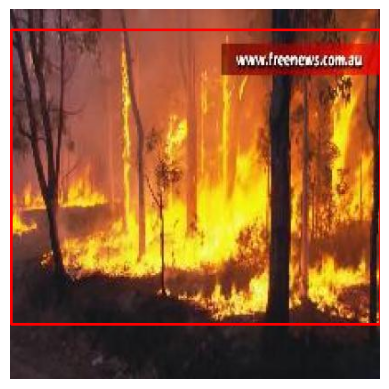

In [6]:
def show_prediction(img_path, model):
    results = model.predict(img_path, conf=0.5)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

IMAGE_PATH = '/kaggle/input/fire-detection/FireDetection/test/images/large_-1081-_jpg.rf.ad307ff4c3ba6357828e38fbc6f2c063.jpg'
show_prediction(IMAGE_PATH, model)


In [8]:
df = pd.read_csv("fire_detection/yolo11n_fire/results.csv")
df.columns

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

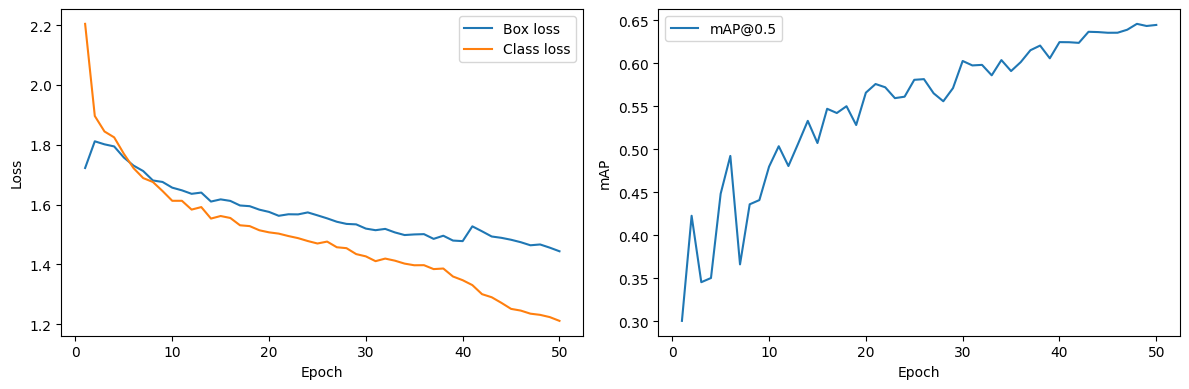

In [9]:
def plot_training_log(log_path):
    df = pd.read_csv(log_path)
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(df['epoch'], df['train/box_loss'], label="Box loss")
    plt.plot(df['epoch'], df['train/cls_loss'], label="Class loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(df['epoch'], df['metrics/mAP50(B)'], label="mAP@0.5")
    plt.xlabel("Epoch")
    plt.ylabel("mAP")
    plt.legend()

    plt.tight_layout()
    plt.show()

# CSV log file nằm trong thư mục runs/train/yolov8_fire/results.csv
plot_training_log("fire_detection/yolo11n_fire/results.csv")


In [10]:
def get_prediction(image_path, model, conf=0.5):
    results = model.predict(image_path, conf=conf)
    output = []
    for r in results:
        for box in r.boxes:
            cls_id = int(box.cls[0])
            conf_score = float(box.conf[0])
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            output.append({
                "class_id": cls_id,
                "confidence": conf_score,
                "box": (x1, y1, x2, y2)
            })
    return output

IMAGE_PATH = '/kaggle/input/fire-detection/FireDetection/test/images/large_-1081-_jpg.rf.ad307ff4c3ba6357828e38fbc6f2c063.jpg'
pred = get_prediction(IMAGE_PATH, model)
print(pred)


image 1/1 /kaggle/input/fire-detection/FireDetection/test/images/large_-1081-_jpg.rf.ad307ff4c3ba6357828e38fbc6f2c063.jpg: 416x416 1 fire, 10.1ms
Speed: 1.1ms preprocess, 10.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)
[{'class_id': 0, 'confidence': 0.5847311615943909, 'box': (1, 23, 416, 354)}]
